Part 1.
Here I implement a decision tree classifier with my data from homework 1. Start with the Imports and data loading.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold

In [2]:
#Load the Data
df = pd.read_csv('annual_csv.csv', usecols = ['Price','Date'])
df['Date'] = df.apply(lambda z: int(z['Date'][:-3]), axis = 1)
priceList = df['Price'].tolist()
priceList = [int(i) for i in priceList]
x = df.drop('Price',axis = 1)
y = priceList

The default decision tree classifier from sklearn has a decent fit for the data. Although my data has a fairly inconsistent trend it is able to guess values over the entire range fairly consistently. In all of the graphs the green dots are my data and the red dots are the predicted values using the model.

Accuracy: 0.7142857142857143


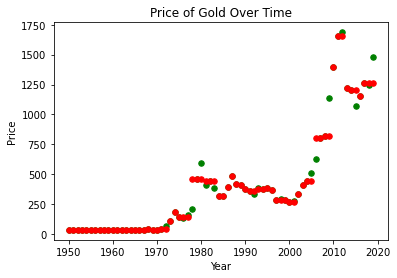

In [11]:
#Train Decision Tree Classifier with default parameters.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
DecisionTree_Class_Model = DecisionTreeClassifier(random_state=0, max_depth=None, min_samples_leaf=1, min_samples_split=2) 
DecisionTree_Class_Model.fit(x_train, y_train)

y_pred = DecisionTree_Class_Model.predict(x)

scores = DecisionTree_Class_Model.score(x, y)
print("Accuracy: " + str(scores))

plt.scatter(x, y, label= "data", color= "green", s=30)
plt.scatter(x, y_pred, label= "prediction", color= "red", s=30)
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Price of Gold Over Time')
plt.show()

Restricting the max_depth parameter makes the model less accurate. Specifically it essentially stops fitting around half way through. This could be because my data does not have a very well defined trend so it requires a lot of fitting, which is not possible with this depth.

Accuracy: 0.4142857142857143


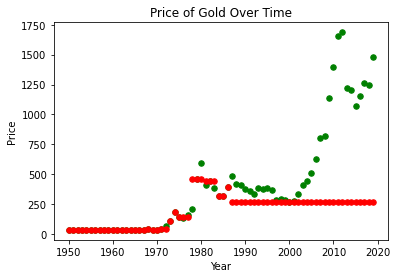

In [4]:
#Altered max_depth to be more restrictive
DecisionTree_Class_Model = DecisionTreeClassifier(random_state=0, max_depth=10, min_samples_leaf=1, min_samples_split=2) 
DecisionTree_Class_Model.fit(x_train, y_train)

y_pred = DecisionTree_Class_Model.predict(x)

scores = DecisionTree_Class_Model.score(x, y)
print("Accuracy: " + str(scores))

plt.scatter(x, y, label= "data", color= "green", s=30)
plt.scatter(x, y_pred, label= "prediction", color= "red", s=30)
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Price of Gold Over Time')
plt.show()

Restricting the min_samples_split parameter has a similar effect to the depth restriction. The model has less freedom to fit the data, which in the case of this data requires a lot of fitting, so it cannot fit the end portion. My data set is not very big either so this restriction is especially impactful.

Accuracy: 0.6142857142857143


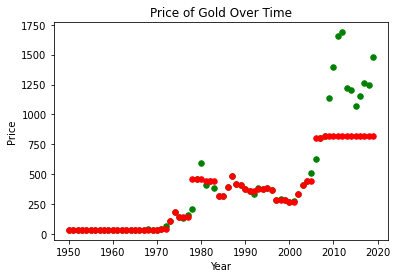

In [5]:
#Altered min_samples_split to be more restrictive
DecisionTree_Class_Model = DecisionTreeClassifier(random_state=0, max_depth=None, min_samples_leaf=1, min_samples_split=8) 
DecisionTree_Class_Model.fit(x_train, y_train)

y_pred = DecisionTree_Class_Model.predict(x)

scores = DecisionTree_Class_Model.score(x, y)
print("Accuracy: " + str(scores))

plt.scatter(x, y, label= "data", color= "green", s=30)
plt.scatter(x, y_pred, label= "prediction", color= "red", s=30)
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Price of Gold Over Time')
plt.show()

Part 2.
Here I set up bagging with the KNeighbors classifier. This method performs worse than the boosting method in both the KFold validation and the scoring that I have been using up to this point which judges based on the number of correct guesses.

KFold Accuracy: 0.143 (0.256)
Accuracy: 0.45714285714285713


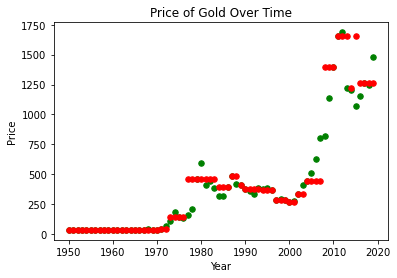

In [6]:
#train using bagging with KNeighbors
clf = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=5), n_estimators=10, random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x)

cv = KFold(n_splits=10)
n_scores = cross_val_score(clf, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('KFold Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

scores = clf.score(x, y)
print("Accuracy: " + str(scores))

plt.scatter(x, y, label= "data", color= "green", s=30)
plt.scatter(x, y_pred, label= "prediction", color= "red", s=30)
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Price of Gold Over Time')
plt.show()

Here I set up boosting with the AdaBoostClassifier. This model performs all around better than the bagging model.

KFold Accuracy: 0.229 (0.357)
Accuracy: 0.6142857142857143


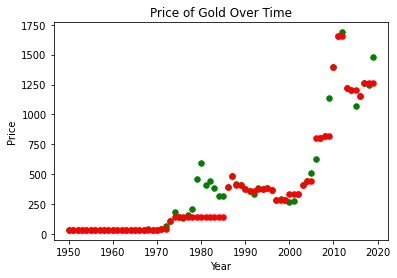

In [7]:
#train using AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(x_train, y_train)
y_pred = clf.predict(x)

cv = KFold(n_splits=10)
n_scores = cross_val_score(clf, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('KFold Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

scores = clf.score(x, y)
print("Accuracy: " + str(scores))

plt.scatter(x, y, label= "data", color= "green", s=30)
plt.scatter(x, y_pred, label= "prediction", color= "red", s=30)
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Price of Gold Over Time')
plt.show()

Both of these models preform fairly poorly with the KFold cross validation. I would guess that this is because my data is not really suited for it. The dataset is both small and without a very clear trend and the KFold validation relies on splitting up this already small and hard to judge dataset. Ultimatly the results are not too dissimilar. The graphs both fit the data about the same and are reasonably accurate given the limitations.

Part 3.
Of the three models I have implemented I believe that the default Decision Tree performed the best overall, with the bagging and boosting methods lagging behind slightly. I am judging this based on the accuracy generated from the .score() method. This metric works by calculating (#correct_predictions / #all_predictions) over the entire set. I used this metric because I think it fits best for my data. 

Throughout these two homeworks I have found that the data I picked is fairly limited because of its small size and hard to find trend. The price of gold, while generally going up over time, is very hard to predict because it is influenced by so many outside forces. The simple accuracy metric produced by the .score() function gives a reasonable idea of how well the model is performing on this dataset despite how limited the data  is. It isn't perfect but it provides a better estimate than the other method we used in this lab.

The KFold cross validation method gives very low scores in the 10%-20% range despite the fact that the models all appear to fit the data at least reasonably well. In addition to this the superior model predicted by this metric changes wildly when the parameters are altered. For example when the number of splits is cut in half from 10 to 5 the predicted best model shifts drastically to favor the bagging method.

In [8]:
clf = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=5), n_estimators=10, random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x)
cv = KFold(n_splits=5)
n_scores = cross_val_score(clf, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Bagging KFold Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

clf = AdaBoostClassifier(n_estimators=100)
clf.fit(x_train, y_train)
y_pred = clf.predict(x)
cv = KFold(n_splits=5)
n_scores = cross_val_score(clf, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Boosting KFold Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Bagging KFold Accuracy: 0.171 (0.215)
Boosting KFold Accuracy: 0.100 (0.200)


KFold is simply not able to get a very good read on the data due to the small size and unclear trend which leads to these low scores and inconsistent nature. I believe that the limitations of my data prevent the KFold() validation from being consistent enough to be reliably used to judge accuracy. I also tested it out on the Decision Tree method with similar results.

In [9]:
cv = KFold(n_splits=10)
n_scores = cross_val_score(DecisionTree_Class_Model, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('KFold Accuracy n_splits=10: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

cv = KFold(n_splits=5)
n_scores = cross_val_score(DecisionTree_Class_Model, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('KFold Accuracy n_splits=5: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

KFold Accuracy n_splits=10: 0.200 (0.314)
KFold Accuracy n_splits=5: 0.171 (0.215)


Using this method could put any one of the three methods on top, which I disagree with because I believe it is clear that the decision tree method is slightly better than the other two based both on the .score() method and also just by looking at how well the data fits on the plots.